## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
%tensorflow_version 2.x
import tensorflow as tf 
print (tf.__version__)

TensorFlow 2.x selected.
2.1.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Checking the floders present 
!ls "/content/drive/My Drive/DogBreed_Classification"

labels.csv.zip	sample_submission.csv.zip  test.zip  train.zip


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/DogBreed_Classification/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path +'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
with ZipFile(project_path +'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
with ZipFile(project_path +'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
with ZipFile(project_path +'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd 
label = pd.read_csv('/content/labels.csv')


In [11]:
label.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


### Print the count of each category of Dogs given in the dataset



In [0]:
breed_count = label.breed.value_counts()

In [13]:
print ('total number of different breed given are ',breed_count.shape)
breed_count

total number of different breed given are  (120,)


scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

### Get one-hot encodings of labels

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
int_encoder = label_encoder.fit_transform(label['breed'])
print(int_encoder)

[19 37 85 ...  3 75 28]


In [0]:
import tensorflow.keras as keras

int_encoder_one_hot = tf.keras.utils.to_categorical(int_encoder,num_classes=None, dtype='int')


## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows = 128
img_cols = 128
num_channel = 1

In [17]:
from tqdm import tqdm
import cv2
x_feature = []
y_feature = []

for f, train_img_breed in tqdm (label.values): # f for format, jpg
  train_img = cv2.imread('./train/{}.jpg'.format(f),1)
  train_img_resize = cv2.resize(train_img, (img_rows,img_cols))
  x_feature.append(train_img_resize)
  y_feature.append(train_img_breed)

100%|██████████| 10222/10222 [00:29<00:00, 341.07it/s]


In [0]:
import numpy as np
x_feature_array = np.array(x_feature)

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_feature_enc = label_encoder.fit_transform(y_feature)
y_feature_cat = tf.keras.utils.to_categorical(y_feature_enc,num_classes=None, dtype='int')
y_feature_cat.shape

(10222, 120)

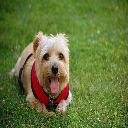

norfolk_terrier 
 79 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [20]:
# Checking images and their labels
from google.colab.patches import cv2_imshow
img = cv2_imshow(x_feature_array[14])

print (y_feature[14],'\n',y_feature_enc[14],'\n', y_feature_cat[14])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
x_norm = x_feature_array/255


In [0]:
x_dim = np.array(tf.keras.backend.expand_dims(
    x_norm,
    axis=1
))

In [23]:
x_dim[1,:].shape

(1, 128, 128, 3)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_val, y_train, y_val = train_test_split(x_feature_array, y_feature_cat, test_size=0.2, random_state=1)

In [26]:
print ('shape of X train data', X_train.shape,  '\n ', ' shape of X val data ', X_val.shape)

shape of X train data (8177, 128, 128, 3) 
   shape of X val data  (2045, 128, 128, 3)


In [27]:
print ('shape of y train data', y_train.shape,  '\n ', ' shape of y val data ', y_val.shape)

shape of y train data (8177, 120) 
   shape of y val data  (2045, 120)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
sample_submission_data = pd.read_csv ('/content/sample_submission.csv')

In [0]:
sample_img = sample_submission_data.id

In [30]:
sample_img.head()

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
2    0012a730dfa437f5f3613fb75efcd4ce
3    001510bc8570bbeee98c8d80c8a95ec1
4    001a5f3114548acdefa3d4da05474c2e
Name: id, dtype: object

Run the below code to load the test image files in x_test_feature

In [31]:
img_rows = 128
img_cols = 128
num_channel = 1


from tqdm import tqdm
import cv2
x_test_feature = []
for f in tqdm(sample_img.values): # f for format ,jpg
    test_img = cv2.imread('./test/{}.jpg'.format(f), 1)
    test_img_resize = cv2.resize(test_img, (img_rows, img_cols)) 
    x_test_feature.append(test_img_resize)

100%|██████████| 10357/10357 [01:10<00:00, 147.61it/s]


Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_feature_array = np.array(x_test_feature)

In [0]:
x_test_feature_array_norm = x_test_feature_array/255

In [0]:
#x_test_feature_array_norm_4d =  np.array(tf.keras.backend.expand_dims(
    #x_test_feature_array_norm,
   # axis=-1
#))

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,Dropout,Activation,Reshape,MaxPooling2D
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
# from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.metrics import Accuracy

#Clear out tensorflow memory
tf.keras.backend.clear_session()


In [0]:
 # Sequential
model = Sequential()


 # 1st CNN layer
model.add(Conv2D(32, (5, 5), padding='same',input_shape=(img_rows,img_cols,3,)))
model.add(Activation('relu'))

 #normalize data
model.add(BatchNormalization())

#Add Max Pool layer
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd CNN layer 
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# Batcth normalizing
model.add(BatchNormalization())

#Add Max Pool layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
# Flattening the layer 
model.add(Flatten())

# Dense layer 
model.add(Dense(256,activation ='relu'))
# Drop out 
model.add(Dropout(0.2))

# Output layer 
model.add(Dense(120,activation='softmax'))

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
activation (Activation)      (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 64)        2

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
#Specify Loass and Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('./dog_breed.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose=1)


In [61]:
history = model.fit(X_train,y_train,          
          validation_data=(X_val,y_val),
          epochs=10,
          verbose = 1,
          batch_size=128,
          callbacks=[model_checkpoint],workers=4)

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 11s 1ms/sample - loss: 6.3476 - accuracy: 0.0102 - val_loss: 4.7919 - val_accuracy: 0.0078
Epoch 2/10
8177/8177 [==============================] - 10s 1ms/sample - loss: 4.7838 - accuracy: 0.0122 - val_loss: 4.7866 - val_accuracy: 0.0078
Epoch 3/10
8177/8177 [==============================] - 10s 1ms/sample - loss: 4.7846 - accuracy: 0.0127 - val_loss: 4.7957 - val_accuracy: 0.0073
Epoch 4/10
8177/8177 [==============================] - 10s 1ms/sample - loss: 4.7736 - accuracy: 0.0139 - val_loss: 4.7915 - val_accuracy: 0.0083
Epoch 5/10
8177/8177 [==============================] - 10s 1ms/sample - loss: 4.7744 - accuracy: 0.0143 - val_loss: 4.8056 - val_accuracy: 0.0078
Epoch 6/10
8177/8177 [==============================] - 10s 1ms/sample - loss: 4.7701 - accuracy: 0.0144 - val_loss: 4.7924 - val_accuracy: 0.0083
Epoch 7/10
8177/8177 [==============================] - 10s 1ms/sample

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
#Define some parameters
img_size = 128
img_depth = 3


In [0]:
#ImageDataGenerator declaration with 20% data as test (80% for training)
img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               horizontal_flip=True,
                                                               validation_split=0.2)

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
#Build training generator. 
train_generator = img_generator.flow(X_train,y_train,batch_size=64)

In [72]:
#Lets check the features (images) and Labels returned by ImageDataGenerator
X, y = next(train_generator)

print('Input features shape', X.shape)
print('Actual labels shape', y.shape)

Input features shape (64, 128, 128, 3)
Actual labels shape (64, 120)


In [0]:
#Build test generator
val_generator = img_generator.flow(X_val,y_val,batch_size=64)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('./dogcnn.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose=1)

In [75]:
model.fit(train_generator,
                    epochs=10,
                    steps_per_epoch= X_train.shape[0]//128,  #Number of training images//batch_size
                    validation_data=val_generator,
                    validation_steps = X_val.shape[0]//128, #Number of test images//batch_size
                    callbacks=[model_checkpoint],workers=4
                    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 63 steps, validate for 15 steps
Epoch 1/10
63/63 [==============================] - 13s 210ms/step - loss: 4.7787 - accuracy: 0.0117 - val_loss: 4.7805 - val_accuracy: 0.0104
Epoch 2/10
63/63 [==============================] - 14s 219ms/step - loss: 4.7775 - accuracy: 0.0144 - val_loss: 4.7804 - val_accuracy: 0.0104
Epoch 3/10
63/63 [==============================] - 13s 212ms/step - loss: 4.7772 - accuracy: 0.0134 - val_loss: 4.7798 - val_accuracy: 0.0104
Epoch 4/10
63/63 [==============================] - 14s 217ms/step - loss: 4.7743 - accuracy: 0.0129 - val_loss: 4.7796 - val_accuracy: 0.0104
Epoch 5/10
63/63 [==============================] - 14s 214ms/step - loss: 4.7756 - accuracy: 0.0146 - val_loss: 4.7908 - val_accuracy: 0.0104
Epoch 6/10
63/63 [==============================] - 14s 215ms/step - loss: 4.7775 - accuracy: 0.0134 - val_loss: 4.7795 - val_accuracy: 0.0104
Epoch 7/10
63/63 [==============================] 

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=('/content/drive/My Drive/ANN DL/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 input_shape=(img_size,img_size, img_depth),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [79]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
#Set pre-trained model layers to not trainable
for layer in base_model.layers:
    layer.trainable = False

In [83]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
x=base_model.output
x=Flatten()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(256,activation='relu')(x) #dense layer 2
preds=Dense(120,activation='softmax')(x)

In [0]:
from tensorflow.keras.models import Model
model_vgg=Model(inputs=base_model.input,outputs=preds)

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [86]:
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_vgg.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [0]:
mckpt_vgg = tf.keras.callbacks.ModelCheckpoint('./dog.h5', 
                                           monitor='val_acc', 
                                           save_best_only=True,
                                           mode='max',
                                           verbose=1)

In [90]:
history_vgg = model_vgg.fit(X_train,y_train,
                    validation_data=(X_val,y_val),
                    epochs=10,
                    batch_size = 32, callbacks=[mckpt_vgg],workers=4)

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 34s 4ms/sample - loss: 4.5568 - accuracy: 0.0896 - val_loss: 3.5029 - val_accuracy: 0.1980
Epoch 2/10
8177/8177 [==============================] - 29s 4ms/sample - loss: 2.8236 - accuracy: 0.2907 - val_loss: 2.8067 - val_accuracy: 0.2993
Epoch 3/10
8177/8177 [==============================] - 29s 4ms/sample - loss: 2.1051 - accuracy: 0.4250 - val_loss: 2.6027 - val_accuracy: 0.3672
Epoch 4/10
8177/8177 [==============================] - 29s 4ms/sample - loss: 1.6592 - accuracy: 0.5304 - val_loss: 2.6123 - val_accuracy: 0.3535
Epoch 5/10
8177/8177 [==============================] - 29s 4ms/sample - loss: 1.3132 - accuracy: 0.6154 - val_loss: 2.8124 - val_accuracy: 0.3687
Epoch 6/10
8177/8177 [==============================] - 29s 4ms/sample - loss: 1.0011 - accuracy: 0.6927 - val_loss: 2.8486 - val_accuracy: 0.3682
Epoch 7/10
8177/8177 [==============================] - 30s 4ms/sample